In [1]:
from sklearn import *
import math
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [65]:
data = pd.read_csv('time_series_covid19_confirmed_global.csv', engine = 'python')

In [66]:
data.drop(['Province/State', 'Lat', 'Long'], inplace = True, axis = 1)

In [67]:
data.index = data['Country/Region']

In [68]:
data.drop(['Country/Region'], axis = 1, inplace = True)

In [69]:
cumulative = np.zeros((data.shape[1]-1))

for i in range(0, len(cumulative)):
    
    cumulative[i] = np.sum(data.iloc[:, i + 1])

In [70]:
days = np.array([i for i in range(0, len(cumulative))])

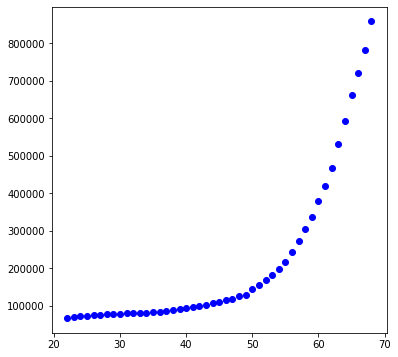

In [71]:
fig, ax = plt.subplots(figsize = (6, 6))
plt.plot(days[22:], (cumulative[22:]), 'bo')

In [72]:
model = linear_model.LinearRegression()
a = np.sum(data.loc['China', '3/31/20'])
cumulative = cumulative - a
X = days[cumulative > 0]
y = data.iloc[:, 51:]
y_cumulative = cumulative[cumulative > 0]
y_cumulative = y_cumulative[X > 38]
X = X[X > 38]
y_log = np.log(y_cumulative)
X = X - X[0]
model.fit(X.reshape(-1,1), y_log)
alpha = model.coef_

In [76]:
X = np.append(X, [30, 31])
y_cumulative = np.append(y_cumulative, [775208 + 73155, 775208 + 73155 + 77349])

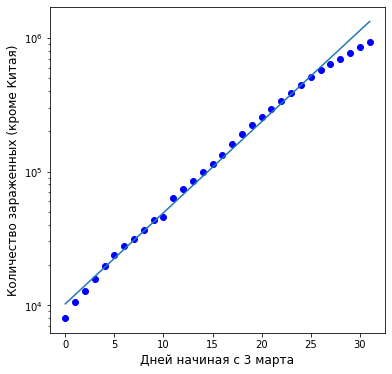

In [77]:
fig, ax = plt.subplots(figsize = (6, 6))
plt.semilogy(X, (y_cumulative), 'bo')
plt.semilogy(X, np.exp(model.intercept_ + alpha*X))
plt.xlabel('Дней начиная с 3 марта', fontsize = 12)
plt.ylabel('Количество зараженных (кроме Китая)', fontsize = 12)
plt.savefig('Фиттинг экспонентой лог-скейл.png', dpi = 300, bbox_inches = 'tight')

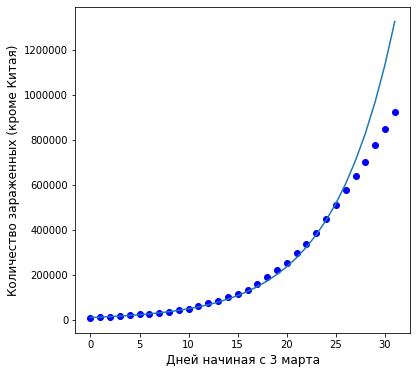

In [78]:
fig, ax = plt.subplots(figsize = (6, 6))
plt.plot(X, (y_cumulative), 'bo')
plt.plot(X, np.exp(model.intercept_ + alpha*X))
plt.xlabel('Дней начиная с 3 марта', fontsize = 12)
plt.ylabel('Количество зараженных (кроме Китая)', fontsize = 12)
plt.savefig('Фиттинг экспонентой.png', dpi = 300, bbox_inches = 'tight')

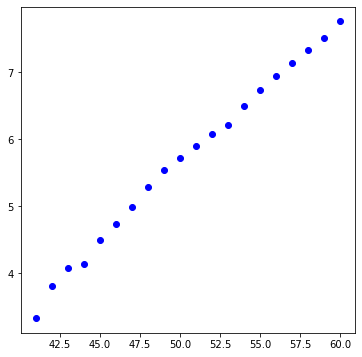

In [104]:
rus_cases = data.loc['Russia']
rus_cases = rus_cases[rus_cases > 0]
time = np.array([i for i in range(0, len(rus_cases))])
fig, ax = plt.subplots(figsize = (6, 6))
plt.plot(time[time>40], np.log(rus_cases[time>40]), 'bo')

In [106]:
rus_cases = rus_cases[time > 40]
time = time[time > 40]
time = time - time[0]
model1 = linear_model.LinearRegression()
model1.fit(time.reshape(-1,1), np.log(rus_cases))
alpha2 = model1.coef_

In [111]:
rus_cases = np.append(rus_cases, [2337 + 489, 2337 + 489 + 779])
time = np.append(time, [20, 21])

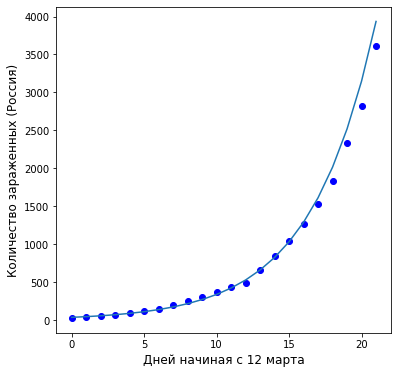

In [112]:
fig, ax = plt.subplots(figsize = (6, 6))
plt.plot(time, rus_cases, 'bo')
plt.plot(time, np.exp(model1.intercept_ + time*alpha2))
plt.xlabel('Дней начиная с 12 марта', fontsize = 12)
plt.ylabel('Количество зараженных (Россия)', fontsize = 12)
plt.savefig('Фиттинг экспонентой Россия.png', dpi = 300, bbox_inches = 'tight')

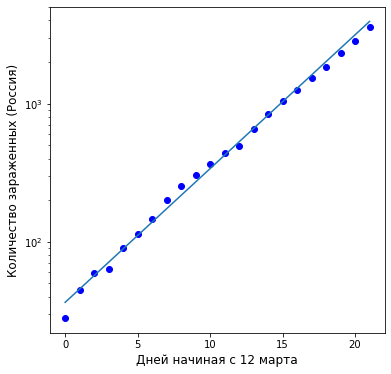

In [113]:
fig, ax = plt.subplots(figsize = (6, 6))
plt.plot(time, rus_cases, 'bo')
plt.semilogy(time, np.exp(model1.intercept_ + time*alpha2))
plt.xlabel('Дней начиная с 12 марта', fontsize = 12)
plt.ylabel('Количество зараженных (Россия)', fontsize = 12)
plt.savefig('Фиттинг экспонентой Россия лог-скейл.png', dpi = 300, bbox_inches = 'tight')

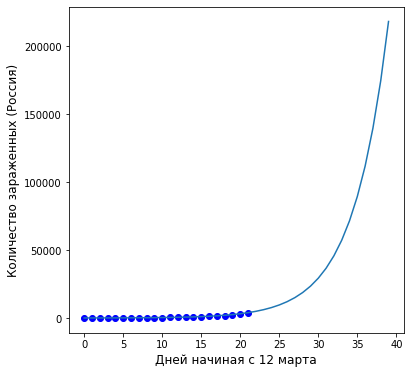

In [114]:
fig, ax = plt.subplots(figsize = (6, 6))
plt.plot(time, rus_cases, 'bo')
plt.plot(days[:40], np.exp(model1.intercept_ + days[:40]*alpha2))
plt.xlabel('Дней начиная с 12 марта', fontsize = 12)
plt.ylabel('Количество зараженных (Россия)', fontsize = 12)
plt.savefig('Фиттинг экспонентой Россия предикт.png', dpi = 300, bbox_inches = 'tight')

In [148]:
model1 = linear_model.LinearRegression()
model1.fit(time.reshape(-1, 1), np.log(rus_cases))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

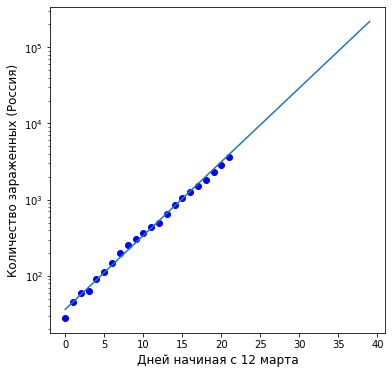

In [115]:
fig, ax = plt.subplots(figsize = (6, 6))
plt.plot(time, rus_cases, 'bo')
plt.semilogy(days[:40], np.exp(model1.intercept_ + days[:40]*alpha2))
plt.xlabel('Дней начиная с 12 марта', fontsize = 12)
plt.ylabel('Количество зараженных (Россия)', fontsize = 12)
plt.savefig('Фиттинг экспонентой Россия предикт лог-скейл.png', dpi = 300, bbox_inches = 'tight')

In [167]:
time

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [175]:
model.intercept_

9.032156122313522

In [176]:
model1.intercept_

3.5929316151259694

In [177]:
model.coef_

array([0.15910802])

In [102]:
rus_cases

3/12/20      28
3/13/20      45
3/14/20      59
3/15/20      63
3/16/20      90
3/17/20     114
3/18/20     147
3/19/20     199
3/20/20     253
3/21/20     306
3/22/20     367
3/23/20     438
3/24/20     495
3/25/20     658
3/26/20     840
3/27/20    1036
3/28/20    1264
3/29/20    1534
3/30/20    1836
3/31/20    2337
Name: Russia, dtype: int64

In [103]:
model1.intercept_

-356.47142857142876

In [105]:
model1.coef_

array([101.25488722])

In [108]:
rus_cases

3/12/20      28
3/13/20      45
3/14/20      59
3/15/20      63
3/16/20      90
3/17/20     114
3/18/20     147
3/19/20     199
3/20/20     253
3/21/20     306
3/22/20     367
3/23/20     438
3/24/20     495
3/25/20     658
3/26/20     840
3/27/20    1036
3/28/20    1264
3/29/20    1534
3/30/20    1836
3/31/20    2337
Name: Russia, dtype: int64

In [109]:
time

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [15]:
x = np.array([1,1,1])
y = np.array([2,-1,0])
A = np.array([[1,0,0], [0,2,-1], [0,-1,3]])
np.arccos((x.T@A@y)/((x.T@A@x)*(y.T@A@y))**0.5)

1.3652273956337226